In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv('mnist_train.csv')
print(d0.head(5))
l=d0['label']
d=d0.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


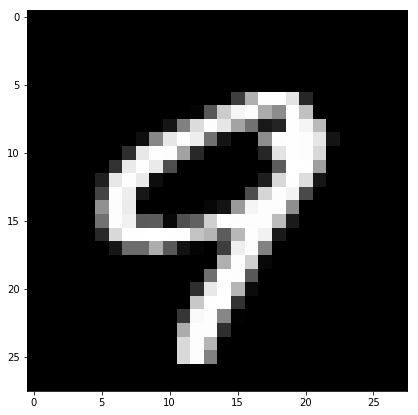

9


In [8]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

# 2D Visualization using PCA

In [9]:
labels=l.head(15000)
data=d.head(15000)
print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [13]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)#column Standardization
print(standardized_data.shape)

(15000, 784)


In [38]:
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
covar_matrix=covar_matrix/15000
print ( "The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [39]:
from scipy.linalg import eigh
#for eigen values and eigen vectors
values,vectors=eigh(covar_matrix,eigvals=(782,783))#top 2 eigen values are taken...782 and 783
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [54]:
new_coordinates = np.matmul(vectors,sample_data.T)
print (" resultanat new data points' shape ", sample_data.shape, "X", vectors.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (15000, 784) X (2, 784)  =  (2, 15000)


In [55]:
import pandas as pd
new_coordinates=np.vstack((new_coordinates,labels)).T
dataframe=pd.DataFrame(data=new_coordinates, columns=("2nd_principal","1st_principal", "label"))#last column is 783 and last 2nd is 782
print(dataframe.head())                      

   2nd_principal  1st_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


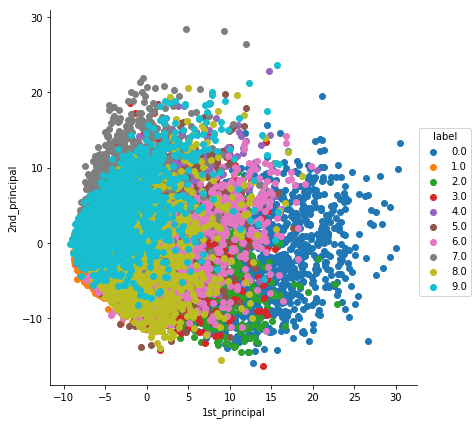

In [57]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [47]:
from sklearn import decomposition
pca=decomposition.PCA()#Initializing the PCA

In [49]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [50]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal", "2nd_principal", "label"))

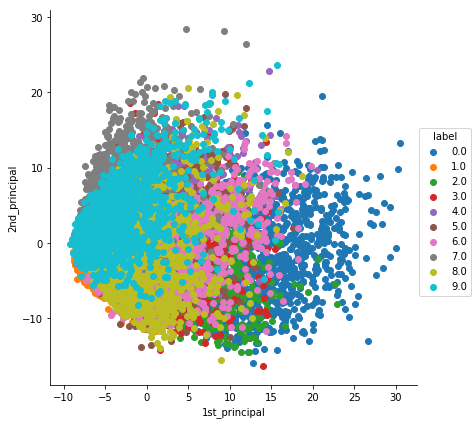

In [51]:
import seaborn as sns
sns.FacetGrid(pca_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

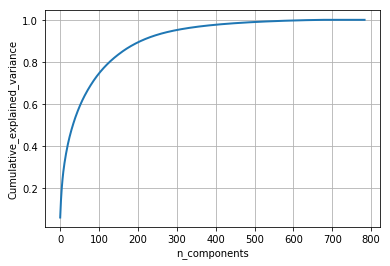

In [62]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)#Fitting all componenets
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)#calculating eigen strength
#explained_variance_ gives the amount of variance explained by each of the selected components
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.clf()#clearing graph
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')#Fitting according to data
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Here we can choose 300 dimensions for > 90% information

# t-SNE using Scikit-Learn

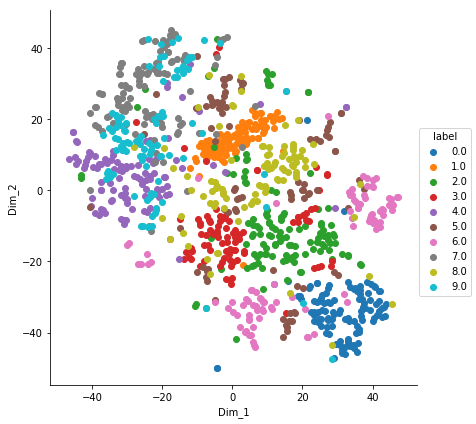

In [63]:
from sklearn.manifold import TSNE
# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)#random_state=0 means no different result will be generated on each run of code
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Below are the codes with different perplexities and different step sizes

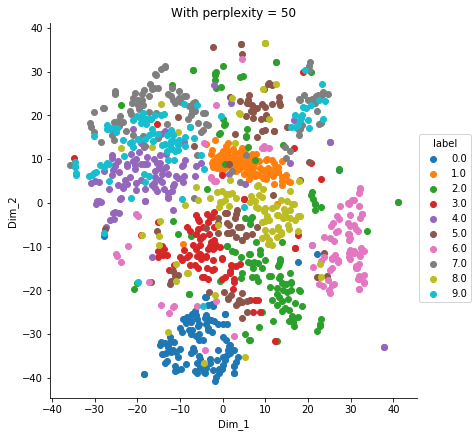

In [65]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

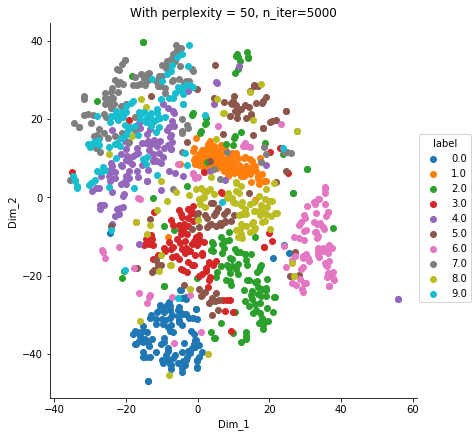

In [66]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

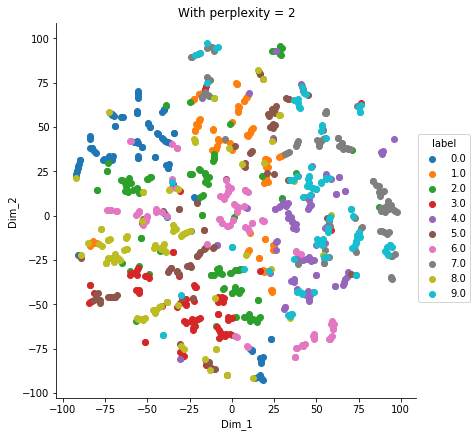

In [67]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()